**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [140]:
# Write your code here
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
import pandas as pd
from scipy.optimize import minimize_scalar, root



%load_ext autoreload
%autoreload 2
from exam2024 import ProductionEconomy
from exam2024 import BarycentricInterpolation
from exam2024 import CareerChoiceModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

To check the market clearing conditions for the given prices, we first define the model in a class in our .py file. Given how the agents in the model act depending on prices we define a market clearing condition which we evalutate by looping through all price combinaitons. To visiualize the market clearing conditions we show the residuals for each market and a dummy-heat map to see if any of the price combinaitons clear the market. 

In [141]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

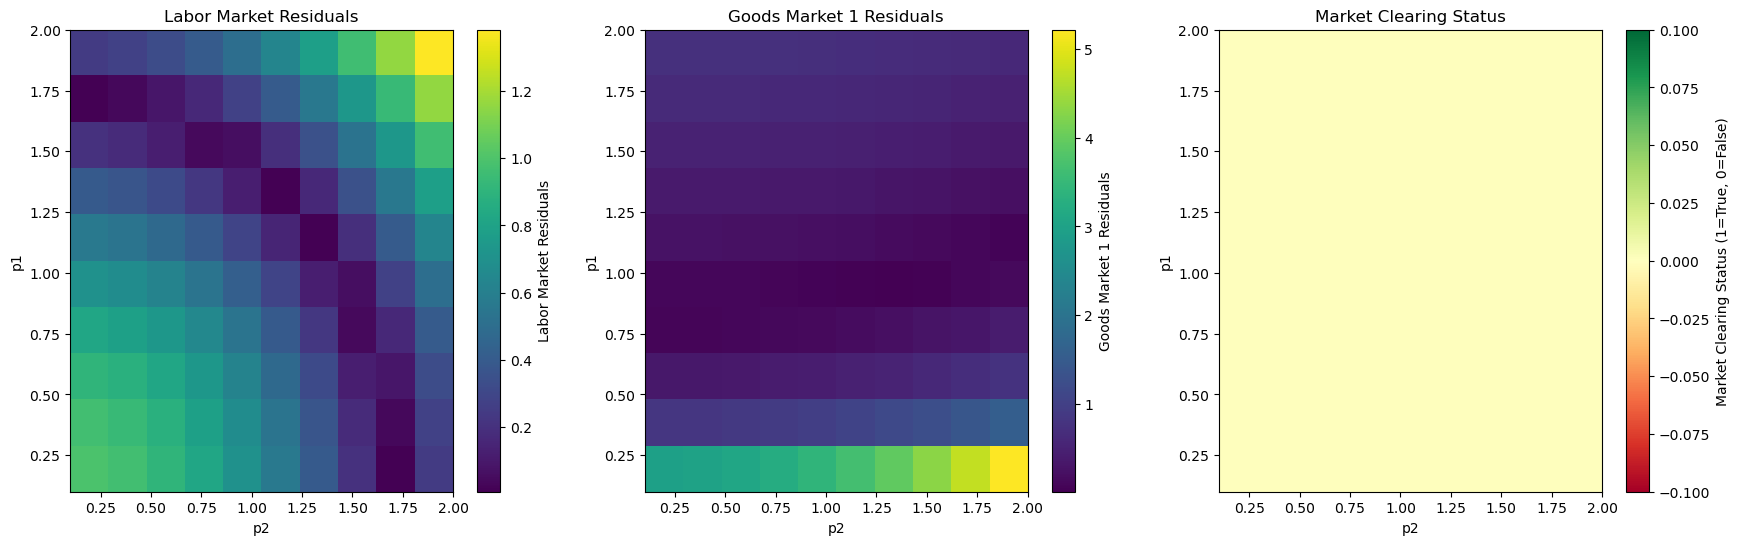

Summary of Market Clearing Conditions:
p1 = 0.1000, p2 = 0.1000, Labor Market Residual = 0.99333757, Goods Market 1 Residual = 2.96001270
p1 = 0.1000, p2 = 0.3111, Labor Market Residual = 0.96448195, Goods Market 1 Residual = 3.00363102
p1 = 0.1000, p2 = 0.5222, Labor Market Residual = 0.90630765, Goods Market 1 Residual = 3.09299702
p1 = 0.1000, p2 = 0.7333, Labor Market Residual = 0.81942756, Goods Market 1 Residual = 3.22994935
p1 = 0.1000, p2 = 0.9444, Labor Market Residual = 0.70471076, Goods Market 1 Residual = 3.41709523
p1 = 0.1000, p2 = 1.1556, Labor Market Residual = 0.56320322, Goods Market 1 Residual = 3.65757264
p1 = 0.1000, p2 = 1.3667, Labor Market Residual = 0.39605805, Goods Market 1 Residual = 3.95484082
p1 = 0.1000, p2 = 1.5778, Labor Market Residual = 0.20443004, Goods Market 1 Residual = 4.31236421
p1 = 0.1000, p2 = 1.7889, Labor Market Residual = -0.01059159, Goods Market 1 Residual = 4.73341042
p1 = 0.1000, p2 = 2.0000, Labor Market Residual = -0.24806409, Goods 

In [142]:
# Initialize the model with default parameters
model = ProductionEconomy()

# Define price ranges
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

# Check market clearing conditions for each combination of p1 and p2
results = np.zeros((len(p1_values), len(p2_values)), dtype=bool)
labor_market_residuals = np.zeros((len(p1_values), len(p2_values)))
goods_market_1_residuals = np.zeros((len(p1_values), len(p2_values)))
summary = []

for i, p1 in enumerate(p1_values):
    for j, p2 in enumerate(p2_values):
        residuals = model.market_clearing_conditions([p1, p2])
        results[i, j] = all(np.isclose(res, 0) for res in residuals)
        labor_market_residuals[i, j] = residuals[0]
        goods_market_1_residuals[i, j] = residuals[1]
        summary.append((p1, p2, residuals))

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Labor market residuals plot
cax1 = axes[0].imshow(np.abs(labor_market_residuals), extent=[p2_values[0], p2_values[-1], p1_values[0], p1_values[-1]], origin='lower', aspect='auto', cmap='viridis')
cbar1 = fig.colorbar(cax1, ax=axes[0], label='Labor Market Residuals')
axes[0].set_xlabel('p2')
axes[0].set_ylabel('p1')
axes[0].set_title('Labor Market Residuals')

# Goods market 1 residuals plot
cax2 = axes[1].imshow(np.abs(goods_market_1_residuals), extent=[p2_values[0], p2_values[-1], p1_values[0], p1_values[-1]], origin='lower', aspect='auto', cmap='viridis')
cbar2 = fig.colorbar(cax2, ax=axes[1], label='Goods Market 1 Residuals')
axes[1].set_xlabel('p2')
axes[1].set_ylabel('p1')
axes[1].set_title('Goods Market 1 Residuals')

# Market clearing status plot
market_clearing_plot = np.where(results, 1, 0)
cax3 = axes[2].imshow(market_clearing_plot, extent=[p2_values[0], p2_values[-1], p1_values[0], p1_values[-1]], origin='lower', aspect='auto', cmap='RdYlGn')
cbar3 = fig.colorbar(cax3, ax=axes[2], label='Market Clearing Status (1=True, 0=False)')
axes[2].set_xlabel('p2')
axes[2].set_ylabel('p1')
axes[2].set_title('Market Clearing Status')

plt.show()

# Print summary
print("Summary of Market Clearing Conditions:")
for p1, p2, residuals in summary:
    print(f'p1 = {p1:6.4f}, p2 = {p2:6.4f}, Labor Market Residual = {residuals[0]:.8f}, Goods Market 1 Residual = {residuals[1]:.8f}')


As seen above none of the 100 price combinations clear the markets. We do note that there is several price combinaitons where the residuals in the two markets are close to 0.

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

To find the equilibrium prices $p_1$ and $p_2$, we added a method called `find_equilibrium_prices`. This method uses numerical optimization to pinpoint the prices where the markets clear. The key part of this method is an objective function, `obj`, which calculates the market clearing residuals for given prices. These residuals show the differences between supply and demand in the labor market and goods market 1. When both residuals hit zero, the markets are in balance.

We employed the `optimize.root` function for the optimization. This function tweaks the prices $p_1$ and $p_2$ to find the root of the objective function, meaning the prices where the market clearing residuals are zero. This tells us that both markets are clearing.

By solving for the prices that make the residuals zero, we make sure that the total labor supplied equals the total labor demanded, and the total consumption of good 1 equals its total production.


In [143]:
# Initialize the model with default parameters
model = ProductionEconomy()

# Calling up the equlibrium finder.
model.find_equilibrium_prices()


Equilibrium prices: p1 = 0.9759, p2 = 1.4908
Labor market clearing: 0.00000000
Good market 1 clearing: -0.00000000
Good market 2 clearing: 0.00000000


So when p1 is 0.9759 and p2 is 1.4908 all markets clear. 

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

To solve Question 3, we added a method `social_welfare` that calculates the social welfare for a given $\tau$. This method recalculates the lump-sum transfer $T$ to ensure the government budget constraint is satisfied, i.e., $T = \tau \cdot c_2^*, where c_2^*$ is the equilibrium consumption of good 2.

To find the optimal $\tau$, we implemented the `maximize_social_welfare` method, which uses the `optimize.minimize` function. The objective function to be minimized is the negative of the social welfare function, ensuring that the optimization process maximizes social welfare. After the optimization completes, the method displays the optimal values of $\tau$ and $T$.


In [144]:
# Initialize the model with default parameters
model = ProductionEconomy()

# Maximize social welfare
model.maximize_social_welfare()

Equilibrium prices: p1 = 0.9759, p2 = 1.4908
Labor market clearing: 0.00000000
Good market 1 clearing: -0.00000000
Good market 2 clearing: -0.04685685
Equilibrium prices: p1 = 0.9902, p2 = 1.4657
Labor market clearing: 0.00000000
Good market 1 clearing: -0.00000000
Good market 2 clearing: -0.00219299
Equilibrium prices: p1 = 0.9909, p2 = 1.4646
Labor market clearing: -0.00000000
Good market 1 clearing: -0.00000000
Good market 2 clearing: -0.26747733
Equilibrium prices: p1 = 1.0709, p2 = 1.3215
Labor market clearing: -0.00000000
Good market 1 clearing: -0.00000000
Good market 2 clearing: -0.08440615
Equilibrium prices: p1 = 1.0935, p2 = 1.2797
Labor market clearing: -0.00000000
Good market 1 clearing: -0.00000000
Good market 2 clearing: 0.09429098
Equilibrium prices: p1 = 1.0691, p2 = 1.3249
Labor market clearing: -0.00000000
Good market 1 clearing: -0.00000000
Good market 2 clearing: 0.02286652
Equilibrium prices: p1 = 1.0629, p2 = 1.3362
Labor market clearing: -0.00000000
Good market 

So the optimal value of $\tau$ is 0.1 which in the equlibrium yeilds a lump sump tax $T$ at 0.0732

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [145]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [146]:
#Setting a seed such that the same outcome from every time the simulation is run
np.random.seed(123)

# We now simulate the epsilon, with normal destribution 0, sigma^2, we do this 10.000 time for each parameter in j.
epsilon = np.random.normal(0, par.sigma, (par.K, par.J))

# We now calculate the utility for each v1, v2, v3. witch is the parameter in v, + the mean of the epsilon.
#  (Axis=0, calculates the mean of the noice in each collum i.e. in each career track)
expected_utilities = par.v + np.mean(epsilon, axis=0)


# We can now print the results
for j in range(par.J):
    print(f"Expected utility for career track {j+1}: {expected_utilities[j]}")

Expected utility for career track 1: 1.03174346628357
Expected utility for career track 2: 2.0220523333377725
Expected utility for career track 3: 2.985918859051432


**We note** that based on our seed and numbers of draws, we have the expectet utility to be fairly close to that of the true value

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

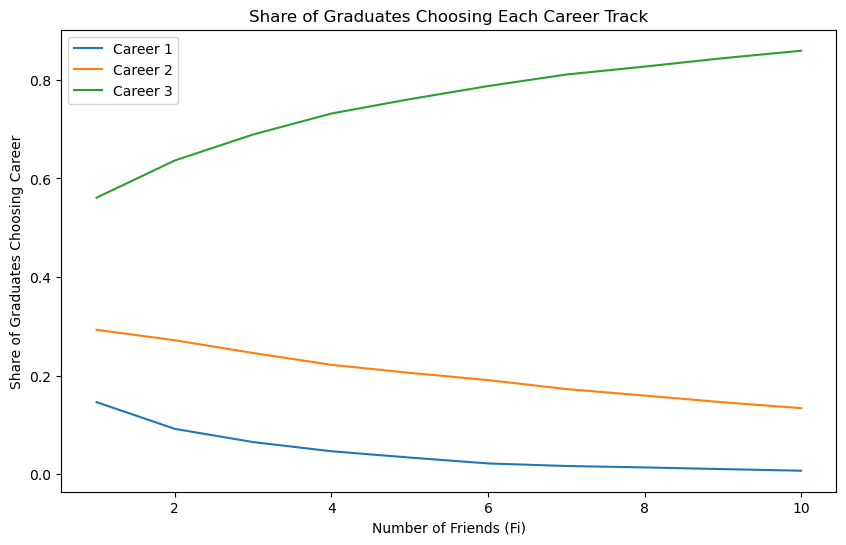

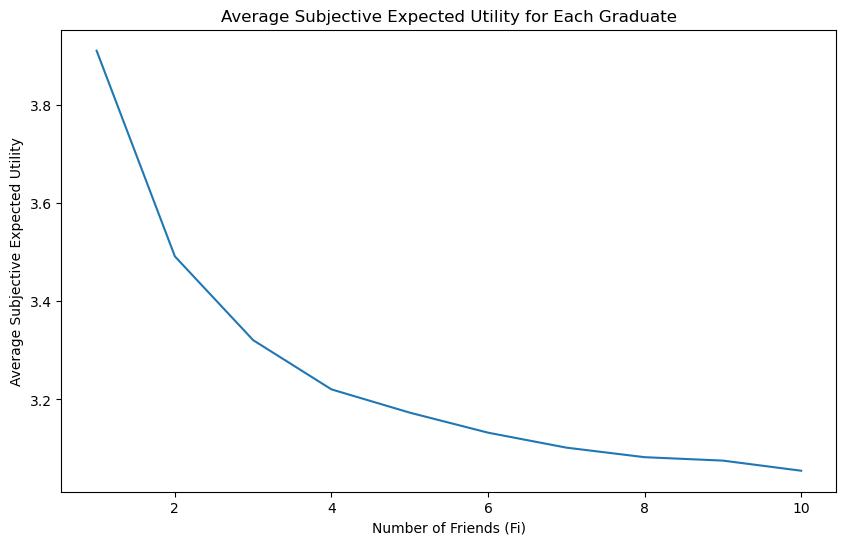

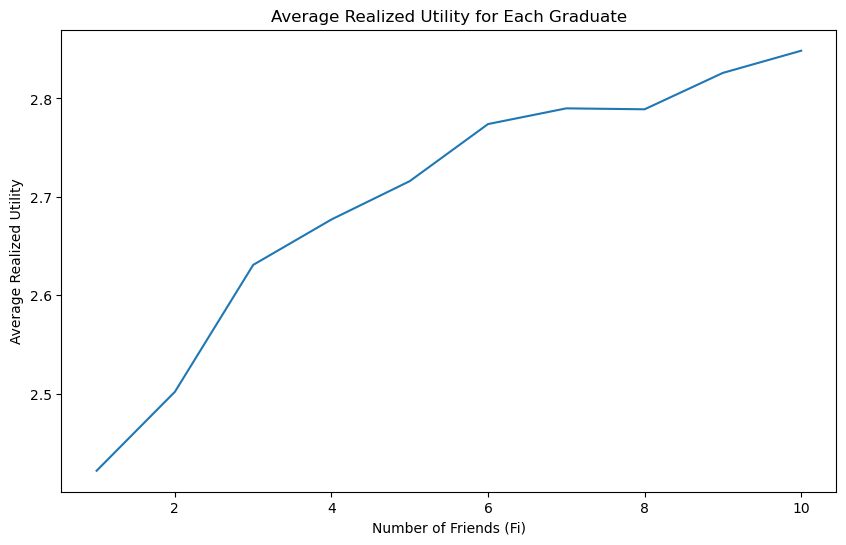

In [147]:
# Create an instance of the CareerChoiceModel
model = CareerChoiceModel(J=3, N=10, K=10000, sigma=2, v=[1, 2, 3])

# Run the simulation
model.simulate()

# Visualize the analyzed results
model.visualize_results()


**what we see:** that as the graduate has more friends, we will be more likely to pic career 3, and less likely to pick career 1
Thie is due to the information from the frineds to come closer to that of the true value, as the friends errors even out, resulting in becomming more likely.
At taking the higher option of career 3.

We also noticed the average Subjective expected utility to fall but the Average realized utility to rise.

This comes from the fact, that with a larger nuber of freinds, the prior expectet utility falls close to that of the true carreri value 3, given the shocks have a smaller effect.

As more people now will choose career 3, we will also end in a larger realized utility. As we have low freinds people will pick the lower value careers given what their freinds tell them, but when the realized value comes they will get a lower amount on average, setting them worse of.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

**We assume that here that** The person has observed the average of the noice such that this becomes: 

Utility_known_chosen = self.par.v[original_career] + epsilon_mean[original_career]

We could also have assumed that the person only observe this is the given period such that, 

Utility_known_chosen = self.par.v[original_career] + individual_noise[original_career]

If this was the case then the results would also differ, such that more people would change careers from 3 rather than from 1, which we found caunter intuitive given, carrer 3 to be better, when the expectet value of the error term is the same.

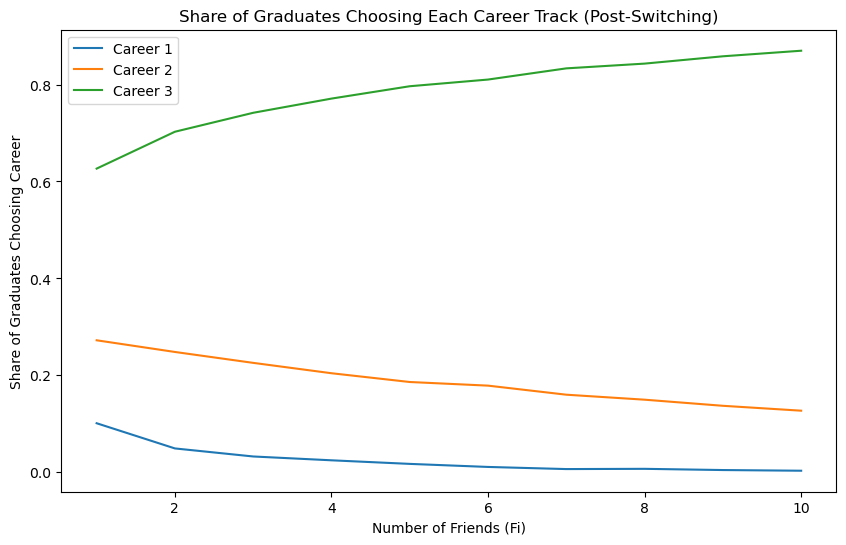

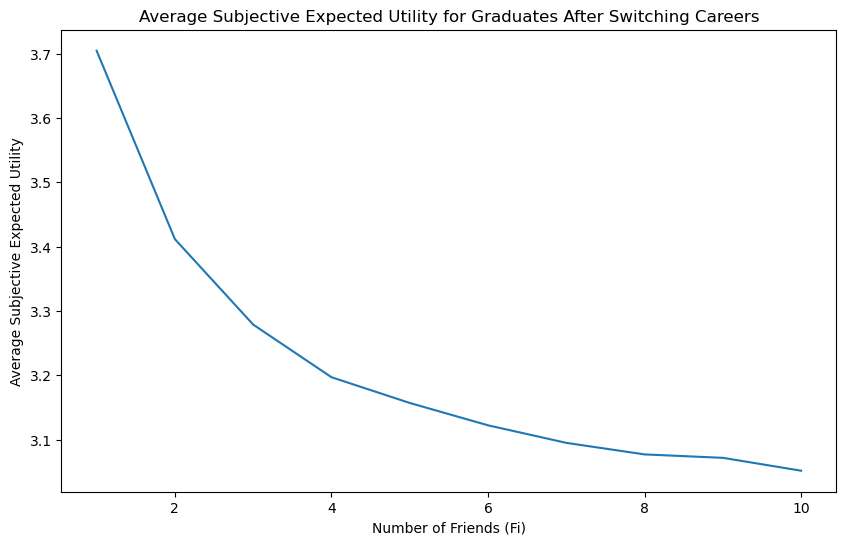

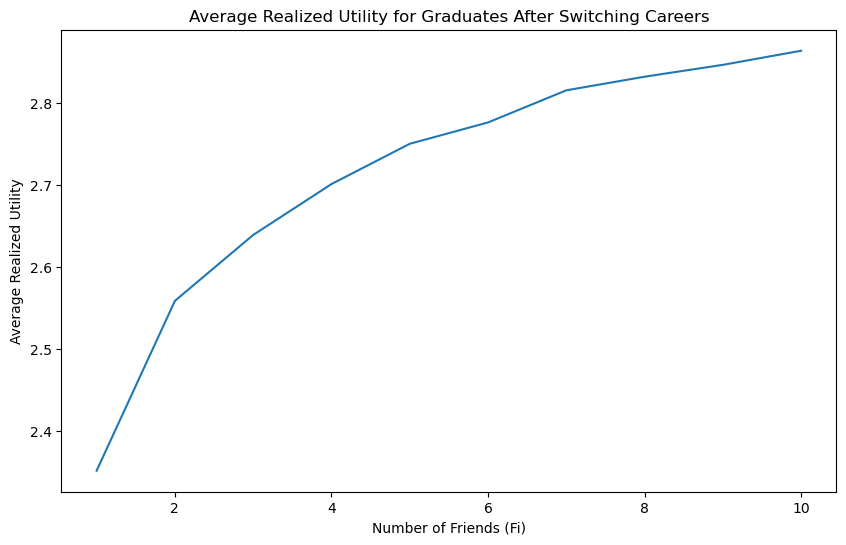

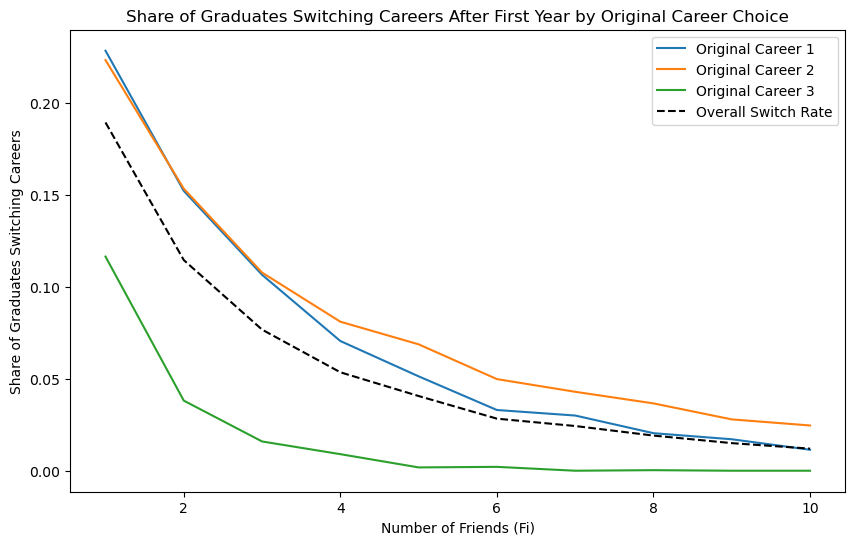

In [148]:
model = CareerChoiceModel(J=3, N=10, K=10000, sigma=2, v=[1, 2, 3])
model.simulate()
model.visualize_results_switched()

**Comparing the Two**  We see that the number of people changing carrers are larger as the individual has less friends, this is do to the smaller sample size creating larger shocks in the expectation. When the number of frinds increases, the effect of a shock on the individual friend also does so, resulting the the value being closer to that of the true value.

We likewise see that its the people who originally picked carrier path 1, who want to changed based on the known information, comes from career path one to be worse, when knowing the true outcome, given the schock has a larger relative effekt on the smaller value.

We can see that rialized utility is fairly similar in the two cases, but is slightly larger in the case where its posible to switch, given you would never be worse off then if you stayed and got the same as before.

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [149]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

In this question, we are tasked with finding the four closest points $A$, $B$, $C$, and $D$ to a given point $y$ from a set of points $X$. Once these points are found, we will ilustrate them together with the point $y$ and the triangles $ABC$ and $CDA$.

### Steps:

1. **Generate Random Points**: We start by generating 50 random points within the unit square $[0, 1] \times [0, 1]$. (given in the question)
2. **Find Closest Points**: Using the Euclidean distance, we find the four closest points to the point $y$.
3. **Illustrate the Points and Triangles**: We plot the points $X$, the point $y$, and the closest points $A$, $B$, $C$, and $D$. We also draw the triangles $ABC$ and $CDA$ to visualize their positions relative to $y$.

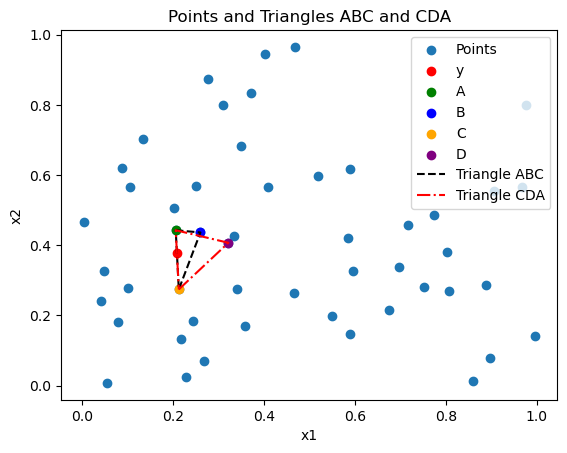

In [150]:
# Find closest points A, B, C, D
A, B, C, D = BarycentricInterpolation.find_closest_points(X, y)

# Plot the points and triangles
plt.scatter(X[:, 0], X[:, 1], label='Points')
plt.scatter(y[0], y[1], color='red', label='y')
plt.scatter(A[0], A[1], color='green', label='A')
plt.scatter(B[0], B[1], color='blue', label='B')
plt.scatter(C[0], C[1], color='orange', label='C')
plt.scatter(D[0], D[1], color='purple', label='D')

# Plot triangles ABC and CDA
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], color='black', linestyle='--', label='Triangle ABC')
plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], color='red', linestyle='-.', label='Triangle CDA')

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points and Triangles ABC and CDA')
plt.show()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In this question, we need to determine the location of the point $y$ in relation to two triangles $ABC$ and $CDA$. To do this, we will compute the barycentric coordinates of $y$ with respect to each triangle and check if $y$ lies within any of these triangles.

### Steps:

1. **Find the Closest Points**: Using the Euclidean distance, we find the four closest points $A$, $B$, $C$, and $D$ to the point $y$ from the set of points $X$.
2. **Compute Barycentric Coordinates**: For each triangle ($ABC$ and $CDA$), we calculate the barycentric coordinates of $y$. These coordinates help us understand how $y$ is positioned relative to the vertices of the triangle.
3. **Check Inside Triangle**: We check if the barycentric coordinates indicate that $y$ lies inside the triangle. If all barycentric coordinates are between 0 and 1, $y$ is inside the triangle.

In [151]:
# Find closest points A, B, C, D
A, B, C, D = BarycentricInterpolation.find_closest_points(X, y)

# Compute the barycentric coordinates of y with respect to triangles ABC and CDA
r1_ABC, r2_ABC, r3_ABC = BarycentricInterpolation.barycentric_coordinates(A, B, C, y)
r1_CDA, r2_CDA, r3_CDA = BarycentricInterpolation.barycentric_coordinates(C, D, A, y)

# Check which triangle y is  located inside
inside_ABC = BarycentricInterpolation.is_inside_triangle(r1_ABC, r2_ABC, r3_ABC)
inside_CDA = BarycentricInterpolation.is_inside_triangle(r1_CDA, r2_CDA, r3_CDA)

# Print results
print(f"Barycentric cordinates of y with respect to triangle ABC: ({r1_ABC}, {r2_ABC}, {r3_ABC})")
print(f"Is y inside trianlge ABC? {'Yes' if inside_ABC else 'No'}")

print(f"Barycentric cordinates of y with respect to triangle CDA: ({r1_CDA}, {r2_CDA}, {r3_CDA})")
print(f"Is y inside trianlge CDA? {'Yes' if inside_CDA else 'No'}")

if inside_ABC:
    print("y is located inside triangle ABC")
elif inside_CDA:
    print("y is located inside triangle CDA")
else:
    print("y is not located inside either triangle")

Barycentric cordinates of y with respect to triangle ABC: (0.6134829803310216, 0.0008797864519075784, 0.3856372332170709)
Is y inside trianlge ABC? Yes
Barycentric cordinates of y with respect to triangle CDA: (0.3855821621027246, 0.00041649660997332384, 0.614001341287302)
Is y inside trianlge CDA? Yes
y is located inside triangle ABC


So y is located inside both of the triangles.

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [152]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In this question, we aim to approximate the value of a function at a given point $y$ using barycentric interpolation. We will determine the location of the point $y$ in relation to two triangles $ABC$ and $CDA$. To do this, we will compute the barycentric coordinates of $y$ with respect to each triangle and check if $y$ lies within any of these triangles.

### Steps:

1. **Find the Closest Points**: Using the Euclidean distance, we find the four closest points $A$, $B$, $C$, and $D$ to the point $y$ from the set of points $X$.
2. **Compute Barycentric Coordinates**: For each triangle ($ABC$ and $CDA$), we calculate the barycentric coordinates of $y$. These coordinates help us understand how $y$ is positioned relative to the vertices of the triangle.
3. **Check Inside Triangle**: We check if the barycentric coordinates indicate that $y$ lies inside the triangle. If all barycentric coordinates are between 0 and 1, $y$ is inside the triangle.
4. **Interpolate Function Value**: If $y$ is inside any of the triangles, we interpolate the function value at $y$ using the barycentric coordinates and the function values at the vertices of the triangle.

In [153]:
f_values = np.array([f(x) for x in X])
interpolated_value = BarycentricInterpolation.interpolate(X, f_values, y)
true_value = f(y)

print(f"Interpolated value at point y: {interpolated_value}")
print(f"True value at point y: {true_value}")

Point y is inside triangle ABC: 0.6134829803310216, 0.0008797864519075784, 0.3856372332170709
Interpolated value at point y: 0.07868737084487641
True value at point y: 0.0789565216259594


We see that since the point is inside the ABC triangle we can find the interpolated value which we compare to the true value. We see that the difference is approx 0.003

**Question 4:** Repeat question 3 for all points in the set $Y$.

To repeat question 3 for all points in the set $Y$ we simply loop through $Y$ calculating the interpolatted value (if possible) and the true value for each point in the set. We then display the results.

In [154]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [155]:
# List to store the results
results = []

# Calculate the interpolated value and the true value for each point in Y
for y in Y:
    interpolated_value = BarycentricInterpolation.interpolate(X, f_values, np.array(y))
    true_value = f(np.array(y))
    results.append((y, interpolated_value, true_value))

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Point (y)', 'Interpolated Value', 'True Value'])

# Display the DataFrame
print(results_df)

Point y is inside triangle CDA: 0.1805466701524854, 0.23677681492212832, 0.5826765149253863
Point y is not inside either triangle
Point y is not inside either triangle
Point y is not inside either triangle
Point y is inside triangle ABC: 0.07253750001960775, 0.45888233704773324, 0.468580162932659
    Point (y)  Interpolated Value  True Value
0  (0.2, 0.2)            0.040326        0.04
1  (0.8, 0.2)                 NaN        0.16
2  (0.8, 0.8)                 NaN        0.64
3  (0.8, 0.2)                 NaN        0.16
4  (0.5, 0.5)            0.244222        0.25
